## Data Understanding
Im zweiten Schritt des CRISP-DM Modells werden sich die Daten genauer angeschaut. Das Ziel ist es hier, die verfügbaren Daten zu verstehen. So soll abgeschätzt werden, ob die verfügbaren Daten in der verfügbaren Qualität dem Problem gerecht werden.
Als erstes müssen die Daten eingelesen werden. Hierfür lässt sich das Python package `pandas` sehr gut verwenden.

In [2]:
import pandas as pd

csv_data = pd.read_csv('data_set.csv', sep=',')

Im nächsten Schritt schauen wir uns den Datensatz erst einmal an.

In [3]:
csv_data.head()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
0,03/20/2013,132007717,03/20/2013,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)"
1,03/10/2013,130608787,03/10/2013,445,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)"
2,12/18/2013,131820260,12/18/2013,745,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)"
3,10/18/2013,131817514,10/18/2013,1730,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)"
4,05/26/2013,130510483,05/25/2013,2000,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)"


Wir sehen einen Datensatz, welcher die Kriminalitätsdaten von Los Angeles enthält.

## Data Preparation

### Data Selection

In diesem Fall ist von Feature Extraction abzusehen, da der vorliegende Datensatz aus einfachen Datentypen besteht. Gleichzeitig ermöglicht das Wissen über die Domäne eine effektive Auswahl der für die Zielfragestellung relevanten Attribute. Deswegen wird für die Data Selection die Feature Selection Methode verwendet. Hierfür gibt es zwei zentrale Methoden: das Entfernen irrelevanter Features und das Entfernen redundanter Features.

- Date.Rptd ist nicht relevant, da wir nach den Daten suchen, wann ein Verbrechen begangen wurde und diese Info bereits in DATE.OCC enthalten ist
- DATE.OCC und TIME.OCC stellen zusammen einen Timestamp dar
- AREA und AREA.NAME haben eine 1:1 Beziehung -> eine kann entfernt werden
- Crm.Cd und CrmCd.Desc stellen 1:1 Beziehung dar (Verbrechensnummer und Name) -> eine kann entfernt werden
- Fraglich auf welcher Abstraktionsebene die Lokation ausgewählt werden sollte: Area gibt guten Überblick, genaue Straßen bzw Koordinaten eventuell zu spezifisch, sodass Overfitting zustande kommt
- Status unwichtig

| Attribut      | Auswahl   | Potentielles Overfitting  | Alternativen  |
|---------------|-----------|---------------------------|---------------|
| Date.Rptd     | Nein      | Nein                      | DATE.OCC      |
| DR.NO	        | Nein      | Nein                      | -             |
| DATE.OCC      | Ja        | Ja                        | Date.Rptd     |
| TIME.OCC      | Ja        | Ja                        | -             |
| AREA          | Nein      | Nein                      | AREA.NAME     |
| AREA.NAME	    | Ja        | Nein                      | AREA          |
| RD            | Möglich   | -                         | -             |
| Crm.Cd        | Ja        | -                         | CrmCd.Desc    | 
| CrmCd.Desc    | Nein      | -                         | Crm.Cd        |
| Status        | Nein      | Nein                      | Status.Desc   |
| Status.Desc   | Nein      | Nein                      | Status        |
| LOCATION      | Möglich   | Ja                        | -             |
| Cross.Street  | Möglich   | Ja                        | -             |
| Location.1    | Möglich   | Ja                        | -             |

<br>

| Attribut      | Auswahl Begründung                                                                                                                        |
|---------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| Date.Rptd     | Irrelevant für Fragestellung, da wir nach dem Auftrittsdatum suchen und dieses besser durch DATE.OCC beschrieben werden kann              |  
| DR.NO	        | Irrelevant für Fragestellung, stellt eine ID für die Identifikation dar                                                                   |
| DATE.OCC      | Gibt tagesgenaue Dokumentierung des Auftreten des Verbrechens wieder, eventuell in Kombination mit TIME.OCC Overfitting                   |
| TIME.OCC      | Gibt minutengenaue Dokumentierung des Auftreten des Verbrechens wieder, eventuell Overfitting, wenn Zeitintervalle zu klein sind          |
| AREA          | ID für den Stadtbereich in LA, 1:1 Beziehung zu AREA.NAME; da Attribut kategorisch -> Verwendung des Namens                               |
| AREA.NAME	    | Name für den Stadtbereich in LA, 1:1 Beziehung zu AREA                                                                                    |
| RD            | Genaue Bedeutung des Attributes derzeit noch unbekannt, steht in n:1 Beziehung mit AREA, vermutlich also ortsbezogen                      |
| Crm.Cd        | ID des Verbrechenstyps, Verwendung der ID, da sich die Beschreibungen der Verbrechen nicht immer dieselben sind; Zielattribut             |
| CrmCd.Desc    | Name des Verbrechenstyps, n:1 Beziehung zu Crm.Cd                                                                                         |
| Status        | Code des Bearbeitungsstandes für das Verbrechen (gelöst, ungelöst etc.); irrelevant für die Fragestellung                                 |
| Status.Desc   | Beschreibung des Bearbeitungsstandes für das Verbrechen (gelöst, ungelöst etc.); irrelevant für die Fragestellung                         |
| LOCATION      | Straße, in welcher das Verbrechen gemeldet wurde; führt eventuell zu Overfitting; Eventuell nur zusammen mit AREA.NAME zur Identifikation |
| Cross.Street  | Kreuzende Straße zu LOCATION; nicht immer vorhanden; führt eventuell zu Overfitting                                                       |
| Location.1    | Koordinaten des aufgetretenen Verbrechens; hohes Risiko für Overfitting; Einfügen in Intervalle macht nicht immer Sinn                    |

In [4]:
csv_data[["DATE.OCC", "TIME.OCC", "AREA.NAME", "CrmCd.Desc", "RD"]]
area_to_rd = {}
for tup in csv_data[["AREA.NAME", "RD"]].values:
    if not tup[0] in area_to_rd:
        area_to_rd[tup[0]] = set()
    area_to_rd[tup[0]].add(tup[1])

rd_to_area = {}
# Reverse mapping
for key in area_to_rd:
    for value in area_to_rd[key]:
        if not value in rd_to_area:
            rd_to_area[value] = set()
        rd_to_area[value].add(key)

print(rd_to_area)
# RD -> AREA is a n:1 mapping

{2049: {'Olympic'}, 2053: {'Olympic'}, 2054: {'Olympic'}, 2055: {'Olympic'}, 2056: {'Olympic'}, 2058: {'Olympic'}, 2062: {'Olympic'}, 2063: {'Olympic'}, 2064: {'Olympic'}, 2069: {'Olympic'}, 2071: {'Olympic'}, 2073: {'Olympic'}, 2074: {'Olympic'}, 2076: {'Olympic'}, 2079: {'Olympic'}, 2081: {'Olympic'}, 2083: {'Olympic'}, 2088: {'Olympic'}, 2091: {'Olympic'}, 2093: {'Olympic'}, 2097: {'Olympic'}, 2099: {'Olympic'}, 2000: {'Olympic'}, 2001: {'Olympic'}, 2002: {'Olympic'}, 2004: {'Olympic'}, 2005: {'Olympic'}, 2011: {'Olympic'}, 2013: {'Olympic'}, 2014: {'Olympic'}, 2015: {'Olympic'}, 2016: {'Olympic'}, 2017: {'Olympic'}, 2019: {'Olympic'}, 2021: {'Olympic'}, 2022: {'Olympic'}, 2023: {'Olympic'}, 2024: {'Olympic'}, 2025: {'Olympic'}, 2026: {'Olympic'}, 2027: {'Olympic'}, 2029: {'Olympic'}, 2031: {'Olympic'}, 2033: {'Olympic'}, 2034: {'Olympic'}, 2035: {'Olympic'}, 2036: {'Olympic'}, 2038: {'Olympic'}, 2039: {'Olympic'}, 2041: {'Olympic'}, 2042: {'Olympic'}, 2044: {'Olympic'}, 2045: {'Oly

- RD steht nicht für die Postleitzahl, möglich wäre die Speicherung ohne führende 9 und 0 also 91 -> 90091
- die herauskommenden Postleitzahlen würden dabei in der Tat im Großraum LA und San Diego liegen jedoch stimmen sie nicht mit den Straßen überein, auf denen Verbrechen begannen wurden

Welche Attribute final ausgewählt werden, wird im Verlauf des Modeling klarer, da aktuell unklar ist, ob bestimmte Orts- und Zeitausprägungen eher auf abstrakter oder konkreter Ebene benötigt werden.

#### Row Selection

Im nächsten Schritt wird evaluiert, ob das Verwenden aller Records sinnhaft ist. Möglich wäre z.B., dass sich die Verbrechensmengen oder Typen über die Zeit verändert haben. Aus diesem Grund analysieren wir im nächsten Schritt, die Menge an Verbrechen pro Jahr in einem Bezirk und die häufig auftretenden Verbrechen pro Jahr in einem bestimmten Bezirk. Falls es große Abweichungen gibt, ist es möglich, dass bestimmte Datensätze nicht zur Analyse verwendet werden sollten.

In [5]:
# Reformat the date from String to Date
csv_data['DATE.OCC'] = pd.to_datetime(csv_data['DATE.OCC'])
# Create a sorted table
data_sorted_by_date_occ = csv_data.sort_values(by='DATE.OCC')
data_sorted_by_date_occ.head()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
236841,01/02/2012,120204045,2012-01-01,330,2,Rampart,216,997,TRAFFIC DR #,IC,Invest Cont,SUNSET BL,ALVARADO BL,"(34.0776, -118.2635)"
237315,11/10/2012,121120767,2012-01-01,800,11,Northeast,1127,354,THEFT OF IDENTITY,IC,Invest Cont,6300 N FIGUEROA ST,NaN,"(34.1155, -118.1843)"
237316,11/11/2012,121120799,2012-01-01,1200,11,Northeast,1117,354,THEFT OF IDENTITY,IC,Invest Cont,4600 EAGLE ROCK BL,NaN,"(34.1275, -118.2179)"
237317,11/24/2012,121121441,2012-01-01,1,11,Northeast,1119,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",IC,Invest Cont,1100 COLORADO BL,NaN,"(34.1374, -118.1897)"
237318,11/30/2012,121121757,2012-01-01,800,11,Northeast,1142,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",IC,Invest Cont,4500 FRANKLIN AV,NaN,"(34.1054, -118.2874)"


In [6]:
data_sorted_by_date_occ.tail()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
985589,12/03/2016,161200991,2016-12-03,1530,12,77th Street,1273,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",IC,Invest Cont,9113 S WESTERN AV,NaN,"(33.9545, -118.309)"
1103082,12/04/2016,161617056,2016-12-03,1230,16,Foothill,1651,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",IC,Invest Cont,13342 KELOWNA ST,NaN,"(34.2483, -118.423)"
1129618,12/03/2016,160326483,2016-12-03,1500,3,Southwest,397,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,IC,Invest Cont,4331 S BUDLONG AV,NaN,"(34.0055, -118.2959)"
982791,12/04/2016,161822319,2016-12-03,1830,18,Southeast,1837,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),IC,Invest Cont,1772 E 111TH PL,NaN,"(33.9339, -118.2434)"
967568,12/04/2016,160128347,2016-12-03,1615,1,Central,153,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",IC,Invest Cont,219 W 7TH ST,NaN,"(34.0445, -118.2523)"


- Zeitreihe geht vom 01.01.2012 bis zum 03.12.2016

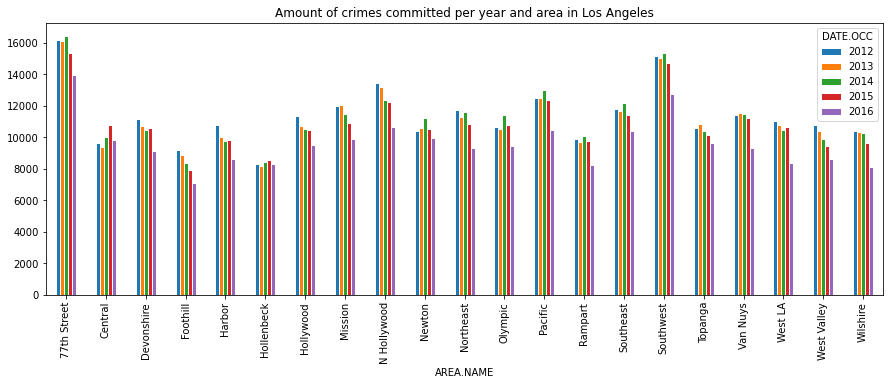

In [7]:
import datetime

# Create dataset with year instead of date
data_with_year = data_sorted_by_date_occ.copy()
data_with_year['DATE.OCC'] = data_with_year['DATE.OCC'].dt.year

only_date_and_area = data_with_year[['AREA.NAME','DATE.OCC','DR.NO']]
only_date_and_area.groupby(['AREA.NAME','DATE.OCC'])['DR.NO'].count().unstack('DATE.OCC').plot(kind='bar', title='Amount of crimes committed per year and area in Los Angeles', width=0.5, edgecolor='white', linewidth=1, figsize=(15, 5))


- auf dem Plot ist zu sehen, dass die Verbrechen über die Zeit rückläufig sind, jedoch in einem geringen Ausmaß
- auch zwischen den Städten keine großen Unterschiede, was den Trend betrifft

c:\Users\Robert.Janus.OFFICE\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


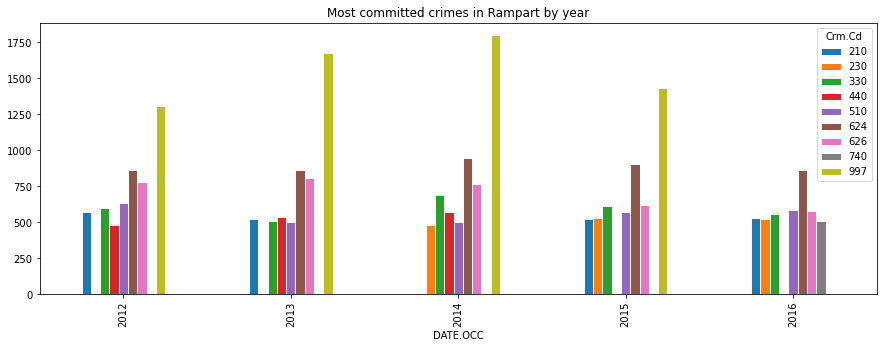

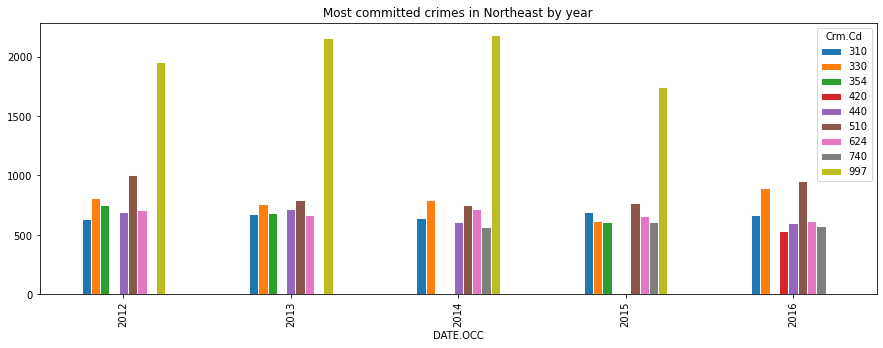

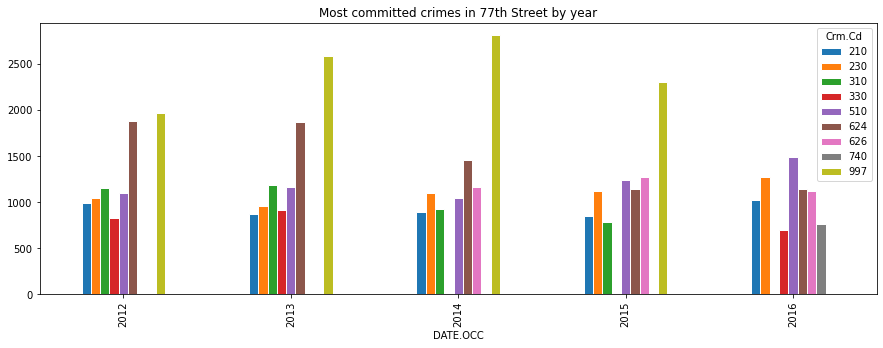

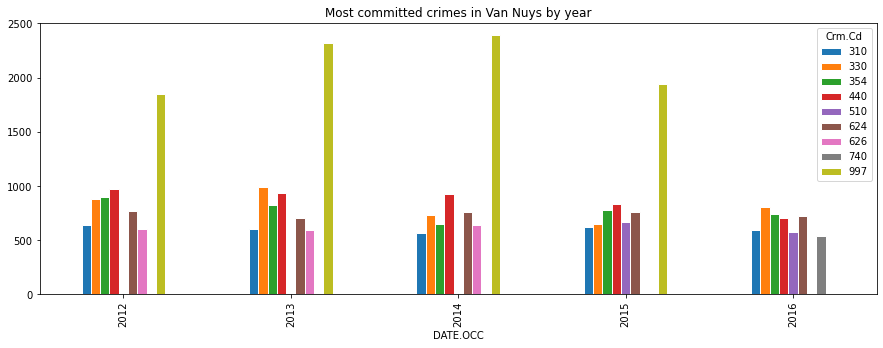

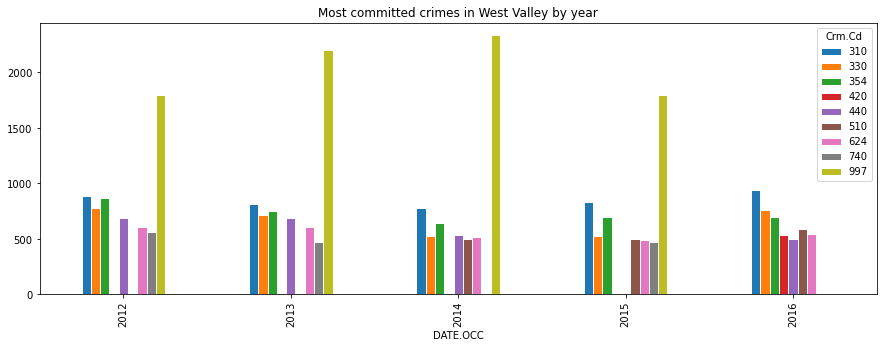

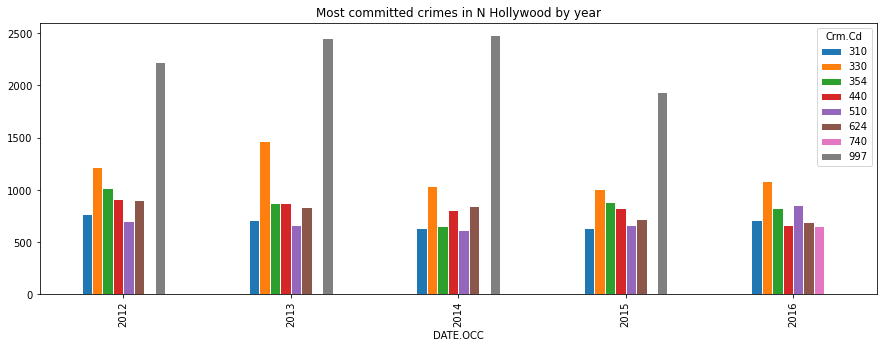

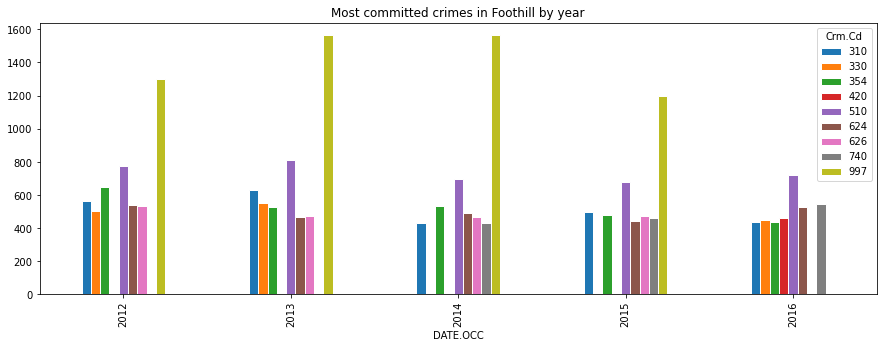

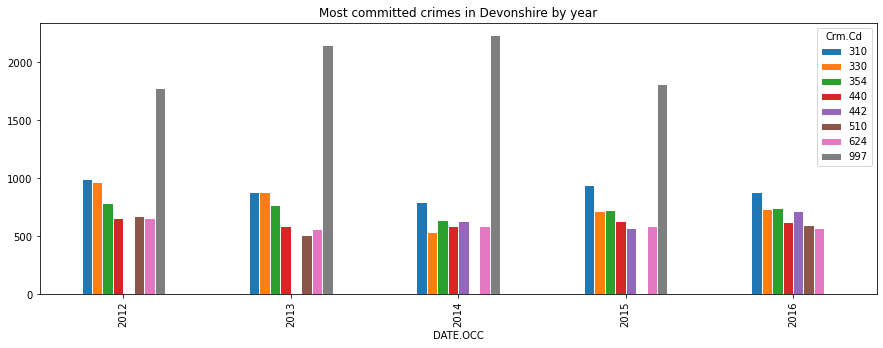

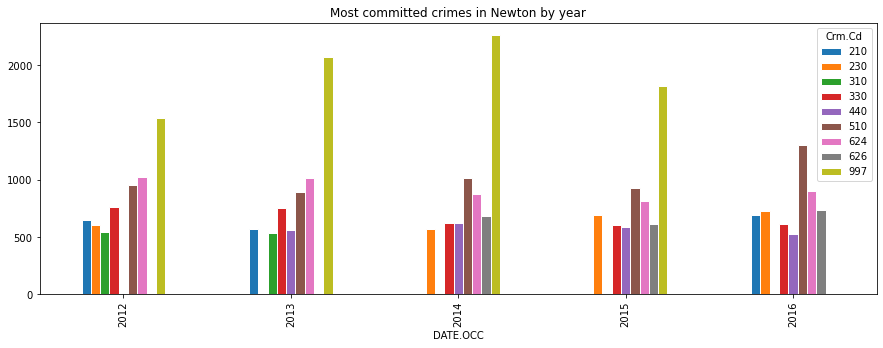

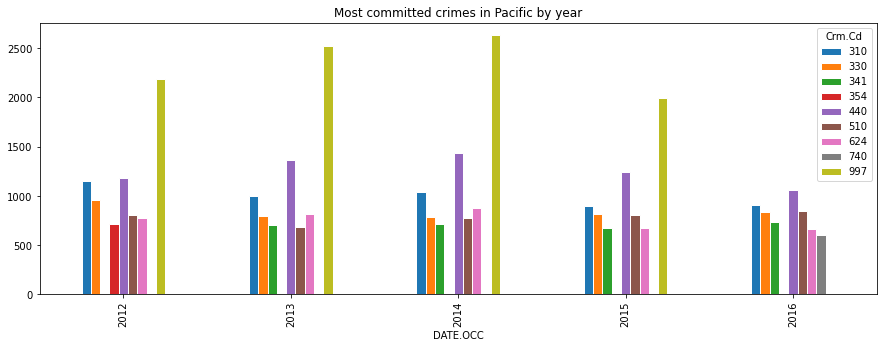

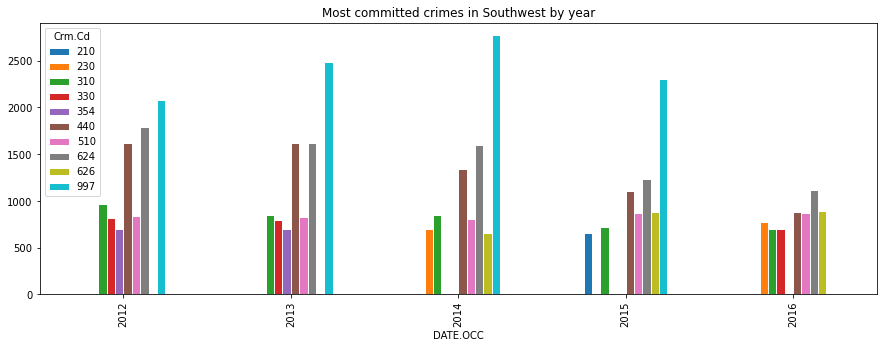

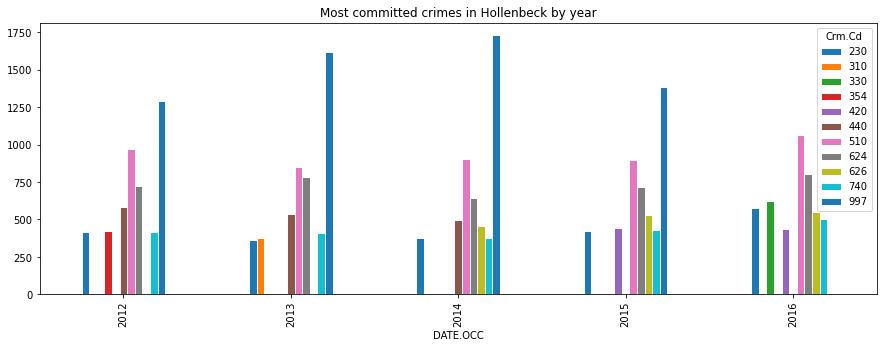

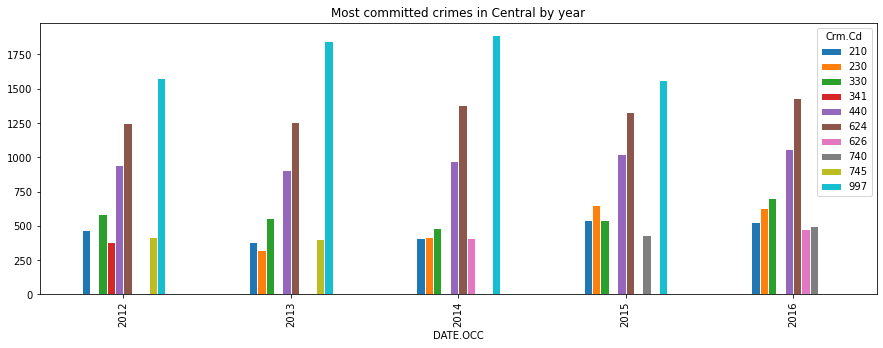

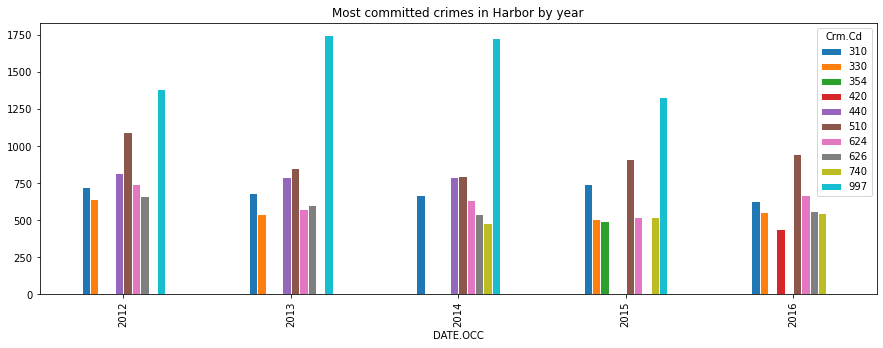

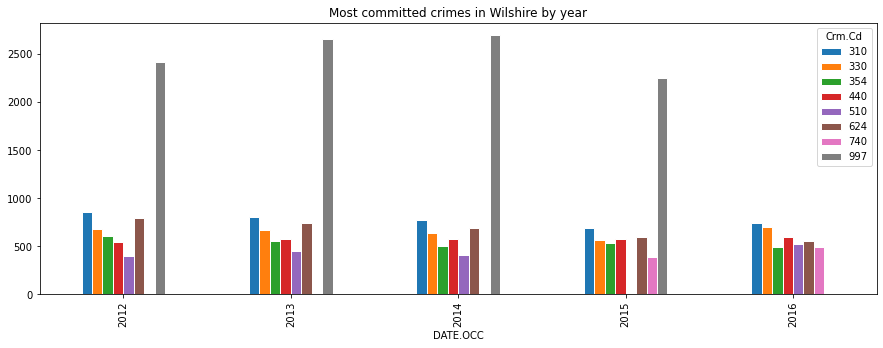

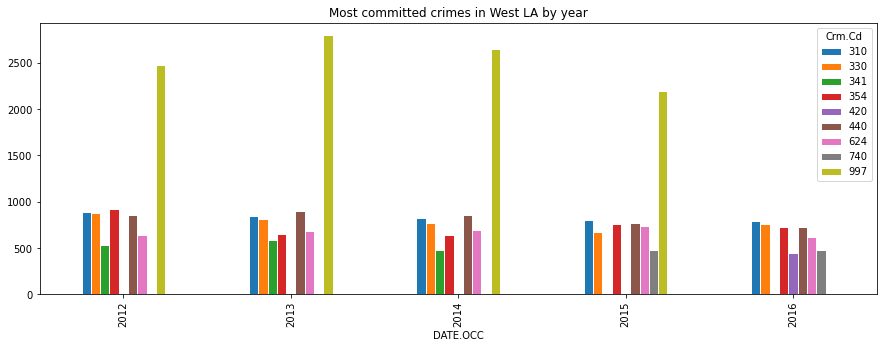

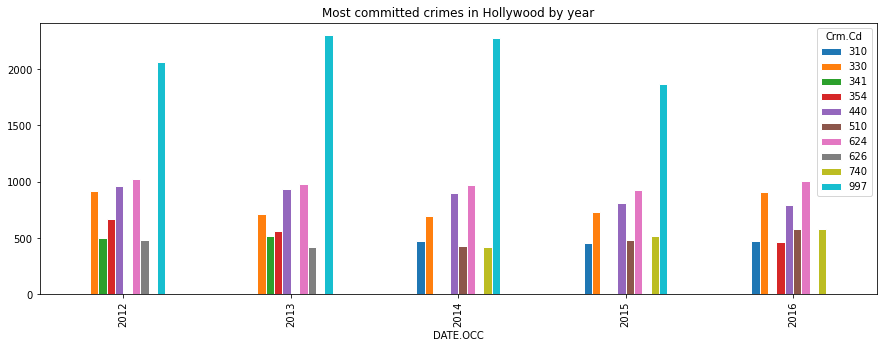

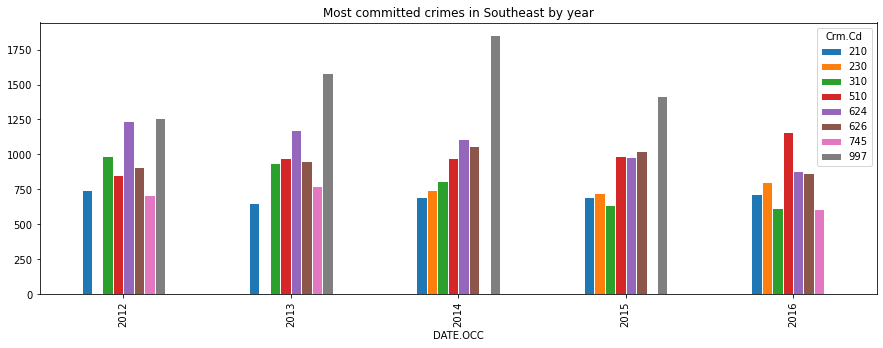

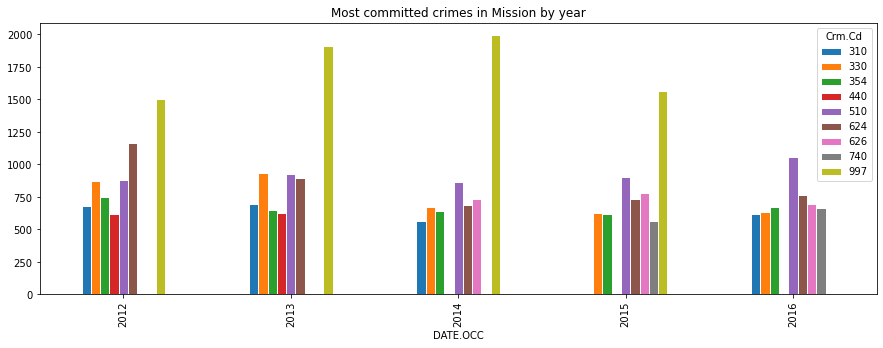

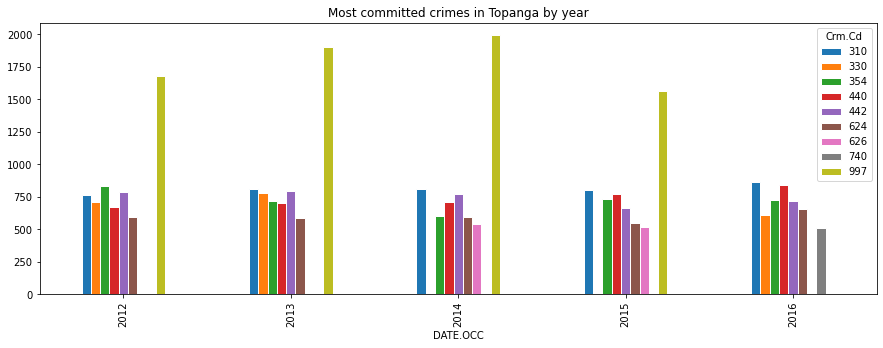

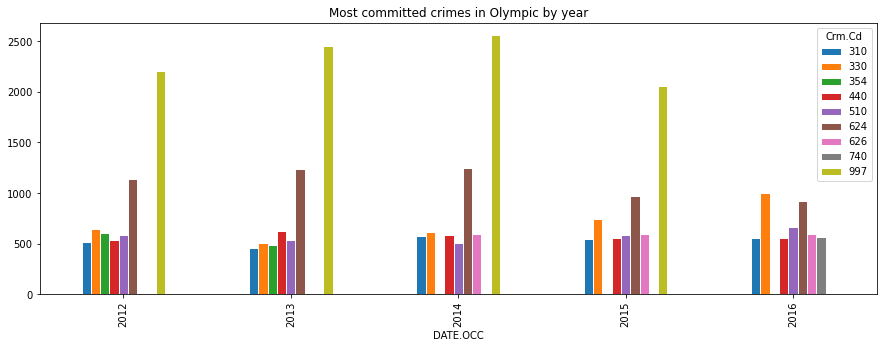

In [8]:
for area in data_with_year['AREA.NAME'].unique():
    data_in_this_area = data_with_year[(data_sorted_by_date_occ['AREA.NAME'] == area)]
    # Group by area and crime and count  
    data_in_this_area = data_in_this_area[['DATE.OCC','Crm.Cd','CrmCd.Desc', 'DR.NO']].groupby(['DATE.OCC','Crm.Cd'])['DR.NO'].count()
    data_in_this_area.groupby(level=0, group_keys=False).nlargest(7).unstack(['Crm.Cd']).plot(kind='bar', title=f'Most committed crimes in {area} by year', width=0.5, edgecolor='white', linewidth=1, figsize=(15, 5))

- Grafik zeigt häufigsten Verbrechen in einem Jahr pro Stadtbezirk
- zwischen den Jahren keine sehr großen Abweichungen (manchmal fallen Straftaten raus, aber nur, weil sie aus der Top 7 raus sind)
- was sehr auffällig ist: das Vergehen TRAFFIC DR# mit dem Code 997 tritt in allen Jahren in allen Bezirken von 2012 bis 2015 am häufigsten auf
- ab 2016 fehlt es jedoch -> dabei steht dieses Vergehen für einen nicht besuchten Gerichtstermin nach einem Verkehrsverstoß (z.B. Überschreiten der Geschwindigkeit)

In [9]:
data_with_year[(data_with_year['Crm.Cd'] == 997) & (data_with_year['DATE.OCC'] >= 2016)]

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1


- Test zeigt: tatsächlich existiert dieser Datensatz für 2016 nicht
- es muss im Data Cleaning untersucht werden, was genau die Ursache hierfür ist
- um sicherzugehen, dass dieses Problem nicht für alle Daten vorliegt, wird im nächsten Schritt die Häufigkeit aller Straftaten pro Jahr tabellarisch gezeigt

In [10]:
from IPython.display import display, HTML

display(HTML(data_with_year[['DATE.OCC','CrmCd.Desc','Crm.Cd','DR.NO']].groupby(['Crm.Cd','CrmCd.Desc','DATE.OCC']).count().to_html()))


- 903 starker Anstieg in 2015
- 930 in 2014 fast komplett weg
- 997 in 2016 komplett am Fehlen

- Rest der Daten "in Ordnung"
- über die Zeit hat sich die Häufigkeit bestimmter Vergehen verändert aber alles im erwartbaren Bereich
- eine Möglichkeit wäre z.B., dass sich der Code verändert hat, allerdings werden die Ausschläge durch keines der anderen Werte ausgeglichen
- hierauf muss im Data Cleaning genauer eingegangen werden

- was außerdem auffällt: 2013 wurden viele Vergehen einmalig umbenannt, um dann im nächsten Jahr wieder die alten Kennzeichnungen zu verwenden

### Data Cleaning
- Fehlende Daten in Dez 2015 & 2016

### Robert 

In [11]:
print("hey")

hey
